# Hiv

In [2]:
import numpy as np
import pandas as pd
import deepchem as dc
from sklearn.ensemble import RandomForestClassifier
from deepchem.models.multitask import SingletaskToMultitask
from deepchem import metrics
from deepchem.metrics import Metric
from deepchem.models.sklearn_models import SklearnModel
from deepchem.splits import RandomStratifiedSplitter, RandomSplitter

In [3]:
from deepchem.molnet.load_function.hiv_datasets import load_hiv

In [4]:
tasks, datasets, transformers = dc.molnet.load_hiv(featurizer='ECFP')
train_dataset, valid_dataset, test_dataset = datasets

In [26]:
tasks

['HIV_active']

In [17]:
dfset=test_dataset.to_dataframe()
dfset

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1018,X1019,X1020,X1021,X1022,X1023,X1024,y,w,ids
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.038902,CN=C1OC2(c3ccccc3)C3=C(OC(=NC)N2C)C(=O)OC3(c2c...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.038902,c1ccc2c(c1)[nH]c1c3ccccc3sc21
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.038902,CN1C(=O)N(C)P(=O)(c2ccccc2)P1c1ccccc1
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.038902,O=C(c1ccccc1)N1OCCCc2ccccc21
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.038902,COC(=O)c1c2c(cc3nc4ccccc4nc13)OCO2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.038902,O=P(Nc1ccccc1)(Nc1ccccc1)Nc1ccccc1
4109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.038902,CC1=C2C(=COC(C)C2C)C(O)=C(C(=O)O)C1=O
4110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.038902,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21
4111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.038902,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...


In [19]:
X=dfset.loc[:,:'X1024']
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1015,X1016,X1017,X1018,X1019,X1020,X1021,X1022,X1023,X1024
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
y=dfset.y
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4108    0.0
4109    0.0
4110    0.0
4111    0.0
4112    0.0
Name: y, Length: 4113, dtype: float64

In [24]:
y1=dfset.w
y1

0       1.038902
1       1.038902
2       1.038902
3       1.038902
4       1.038902
          ...   
4108    1.038902
4109    1.038902
4110    1.038902
4111    1.038902
4112    1.038902
Name: w, Length: 4113, dtype: float64

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score

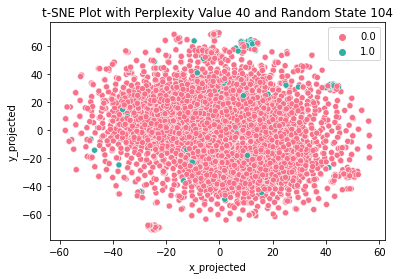

In [23]:
tsne = TSNE(n_components=2, perplexity=40, random_state=104)
data_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
df_combo = pd.concat([dfset, df_tsne], axis=1)
sns.scatterplot(x='x_projected',y='y_projected', hue=y, palette=sns.color_palette("husl", 2), data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(40, 104))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

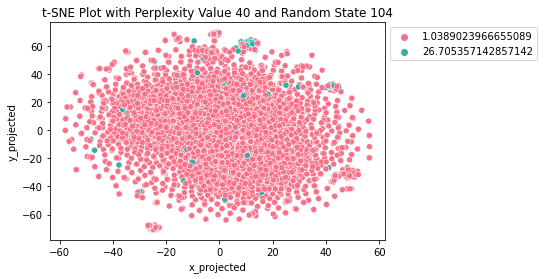

In [25]:
tsne = TSNE(n_components=2, perplexity=40, random_state=104)
data_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
df_combo = pd.concat([dfset, df_tsne], axis=1)
sns.scatterplot(x='x_projected',y='y_projected', hue=y1, palette=sns.color_palette("husl", 2), data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(40, 104))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [7]:
train_dataset

<DiskDataset X.shape: (32901, 1024), y.shape: (32901, 1), w.shape: (32901, 1), task_names: ['HIV_active']>

MultitaskClassifier

In [8]:
model = dc.models.MultitaskClassifier(n_tasks=1, n_features=1024, layer_sizes=[1000])

In [9]:
metric_model = dc.metrics.Metric(dc.metrics.roc_auc_score)
print('train set score:', model.evaluate(train_dataset, [metric_model], transformers))
print('test set score:', model.evaluate(test_dataset, [metric_model], transformers))

train set score: {'roc_auc_score': 0.4864091802565744}
test set score: {'roc_auc_score': 0.4561313466849495}


MultitaskFitTransformRegressor

In [10]:
model = dc.models.MultitaskFitTransformRegressor(n_tasks=1, n_features=1024)

In [11]:
metric_model = dc.metrics.Metric(dc.metrics.roc_auc_score)
print('train set score:', model.evaluate(train_dataset, [metric_model], transformers))
print('test set score:', model.evaluate(test_dataset, [metric_model], transformers))

train set score: {'roc_auc_score': 0.5101979541425451}
test set score: {'roc_auc_score': 0.5592556828057706}


GraphConvModel

In [13]:
tasks, datasets, transformers = dc.molnet.load_hiv(featurizer=dc.feat.ConvMolFeaturizer())
train_dataset, valid_dataset, test_dataset = datasets

[19:15:26] WARNING: not removing hydrogen atom without neighbors
[19:15:26] WARNING: not removing hydrogen atom without neighbors
[19:15:45] WARNING: not removing hydrogen atom without neighbors
[19:15:45] WARNING: not removing hydrogen atom without neighbors


In [14]:
model = dc.models.GraphConvModel(n_tasks=1, mode='classification')

In [15]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
print('Training set score:', model.evaluate(train_dataset, [metric], transformers))
print('Test set score:', model.evaluate(test_dataset, [metric], transformers))

Training set score: {'roc_auc_score': 0.5023928581168113}
Test set score: {'roc_auc_score': 0.57543840166863}


GATmodel

In [16]:
tasks, datasets, transformers = dc.molnet.load_hiv(featurizer=dc.feat.MolGraphConvFeaturizer())
train_dataset, valid_dataset, test_dataset = datasets

[19:21:50] WARNING: not removing hydrogen atom without neighbors
[19:21:50] WARNING: not removing hydrogen atom without neighbors
[19:22:55] WARNING: not removing hydrogen atom without neighbors
[19:22:55] WARNING: not removing hydrogen atom without neighbors


In [17]:
from deepchem.models import GATModel
model = dc.models.GATModel(mode='classification', n_tasks=1,batch_size=16, learning_rate=0.001)

In [18]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
print('Train set score:', model.evaluate(train_dataset, [metric], transformers))
print('Test set score:', model.evaluate(test_dataset, [metric], transformers))

Train set score: {'roc_auc_score': 0.36234108142954335}
Test set score: {'roc_auc_score': 0.2746769926031789}


GCNModel

In [19]:
from deepchem.models import GCNModel
model = dc.models.GCNModel(mode='classification', n_tasks=1,batch_size=16, learning_rate=0.001)

In [20]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
print('Train set score:', model.evaluate(train_dataset, [metric], transformers))
print('Test set score:', model.evaluate(test_dataset, [metric], transformers))

Train set score: {'roc_auc_score': 0.6033007103099306}
Test set score: {'roc_auc_score': 0.7301010061994244}
